# Vehicle Fraud Detection

## Loading Data and Data Exploration

In [150]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading data
data = pd.read_csv('carclaims.csv')

# Basic info on data
print("Dataset shape:", data.shape) # Rows and Columns of dataset
print("Data Type:", data.info())
# print("\nMissing Values\n", data.isnull().sum().sum()) 
print("\nClass Distribution", data['FraudFound'].value_counts(normalize=True))


Dataset shape: (15420, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNum

## Data Preprocessing

In [151]:
data.head(1)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No


In [152]:
# copy of data to avoid modifying original data
data_copy = data.copy()

In [153]:
data_copy.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [154]:
# check any columns for repeating data 
data_copy[['AgeOfPolicyHolder', 'Age']]

,AgeOfPolicyHolder,Age
0,26 to 30,21
1,31 to 35,34
2,41 to 50,47
3,51 to 65,65
4,31 to 35,27
...,...,...
15415,31 to 35,35
15416,31 to 35,30
15417,26 to 30,24
15418,31 to 35,34


In [155]:
data_copy[['BasePolicy', 'PolicyType', 'VehicleCategory']]

,BasePolicy,PolicyType,VehicleCategory
0,Liability,Sport - Liability,Sport
1,Collision,Sport - Collision,Sport
2,Collision,Sport - Collision,Sport
3,Liability,Sedan - Liability,Sport
4,Collision,Sport - Collision,Sport
...,...,...,...
15415,Collision,Sedan - Collision,Sedan
15416,Liability,Sedan - Liability,Sport
15417,Collision,Sedan - Collision,Sedan
15418,All Perils,Sedan - All Perils,Sedan


### Removing redundant data columns
### Separating claim data from fraud status 

In [156]:
# list of all redundant data points
unwanted_data = ['PolicyNumber', 'BasePolicy', 'VehicleCategory', 'Age', 'FraudFound']

#  Remove redundant data points
X = data_copy.drop(unwanted_data, axis=1)

#table that links entry ID in X to fraud value
y = data_copy['FraudFound']

In [157]:
# Extract categorical data, all data columns with datatype = object
categorical_columns = X.select_dtypes(include=['object']).columns.tolist() # storing data columns as a list for easier handling
encoder = OneHotEncoder(sparse_output=False)

#  applying encoder to categorical data
# fit_transform identifies all unique values in a category and transforms them into binary
one_hot = encoder.fit_transform(X[categorical_columns])

# Data frame of encoded columns
one_hot_X = pd.DataFrame(one_hot, columns = encoder.get_feature_names_out(categorical_columns))

# concat encoded data frame with original data
X_encoded = pd.concat([X, one_hot_X], axis = 1)

# Drop original categorical columns
X_encoded = X_encoded.drop(categorical_columns, axis = 1)
# print(f"Encoded data :\n {X_encoded}")

### Splitting Dataset, Train and Test

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size = 0.1, random_state = 0
)

## Building Algorithms to Test Various Methods

### Logistic Regression

Accuracy: 0.6511024643320363
              precision    recall  f1-score   support

          No       0.99      0.63      0.77      1433
         Yes       0.16      0.94      0.27       109

    accuracy                           0.65      1542
   macro avg       0.58      0.78      0.52      1542
weighted avg       0.93      0.65      0.74      1542



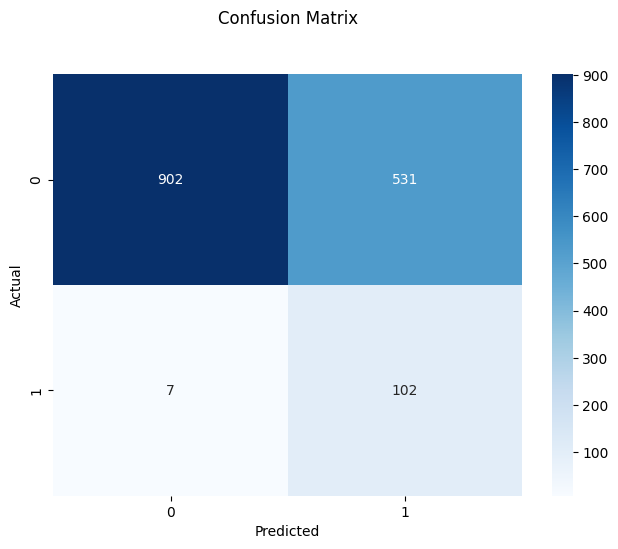

(LogisticRegression(class_weight='balanced', max_iter=9000, random_state=0),
 array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object),
 array([[902, 531],
        [  7, 102]]))

In [ ]:
def logistic_regression(X_train, X_test, y_test, y_train):
    lr_model = LogisticRegression(
        class_weight = 'balanced', # balanced it sufficient as fraud is the minority class
        max_iter = 9000,
        random_state = 0
    )
    ## Accuracy 'No' = 99% 'Yes' = 14%
    #  Recall 'No' = 0.64 'Yes' = 91%
    #  Good at at identifying non fraudulent claims, terrible at identifying fraud
    #  Over classifies fraudulent claims
    #  This is because fraud claims are a small portion of samples so classes are imbalanced, so difficult to learn
    # ##
    
    # Training model
    lr_model.fit(X_train, y_train)
    
    # Make Predictions
    y_pred = lr_model.predict(X_test)
    
    # Evaluation with confusion Matrix
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    # cnf_matrix
    
    # create heatmap
    sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt='d')
    plt.tight_layout()
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return lr_model, y_pred, cnf_matrix

logistic_regression(X_train, X_test, y_test, y_train)
    